In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import datetime
sns.set()

In [2]:
loan_data=pd.read_csv("C:\\Users\\yfawz\\OneDrive\\Desktop\\load_default_prediction\\data\\raw\\loan.csv", low_memory=False)

In [3]:
feature_desc=pd.read_excel("C:\\Users\\yfawz\\OneDrive\\Desktop\\load_default_prediction\\data\\raw\\LCDataDictionary.xlsx")

In [4]:
print("There are " + str(loan_data.shape[0]) + " rows")
print("There are " + str(loan_data.shape[1]) + " columns")

There are 2260668 rows
There are 145 columns


In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [174]:
feature_desc[feature_desc['LoanStatNew']=="recoveries"]['Description'].values

array(['post charge off gross recovery'], dtype=object)

There are 145 features in this dataset but we will examine some of the more sigificant ones 
This includes:
1. Loan amounts
2. Terms
3. Interest rates
4. Installments
5. Grades and subgrades
6. Employment information(Title, length)
7. Home Ownership
8. Annual income
9. Loan Status 
10. Purpose of Loan
11. Location Analysis of Loans
12. How have features changed over time?
13. Are there features with significant correlations?

In [7]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


# 1. Loan Amount

In [15]:
feature_desc[feature_desc['LoanStatNew']=="loan_amnt"]['Description'].values

array(['The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'],
      dtype=object)

Let's start with examiningn how the loan amounts are distributed 

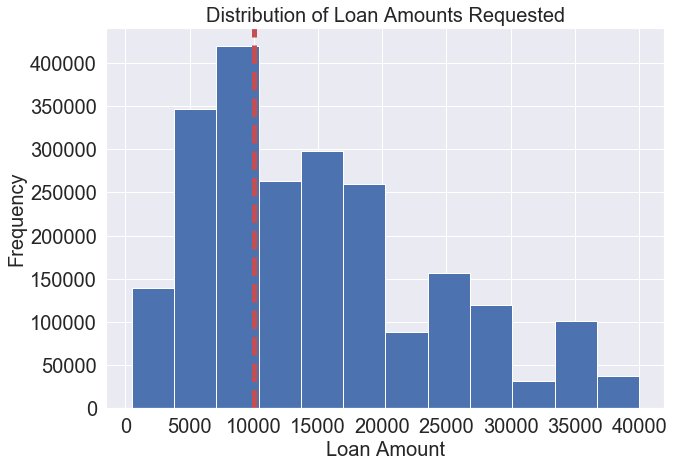

In [148]:
#plotting loan amounts requested
plt.figure(figsize=[10,7])
plt.hist(loan_data.loan_amnt, bins=12)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axvline(10000, color='r', linestyle="--", linewidth=5)

plt.title("Distribution of Loan Amounts Requested",size=20)
plt.xlabel("Loan Amount",size=20)
plt.ylabel("Frequency",size=20);

- The distribution is skewed to the right (Exponential decaying to the right handside)
- The most common loan amount is $10,000

By plottig the ECDF we can see where the majority of distributin lies

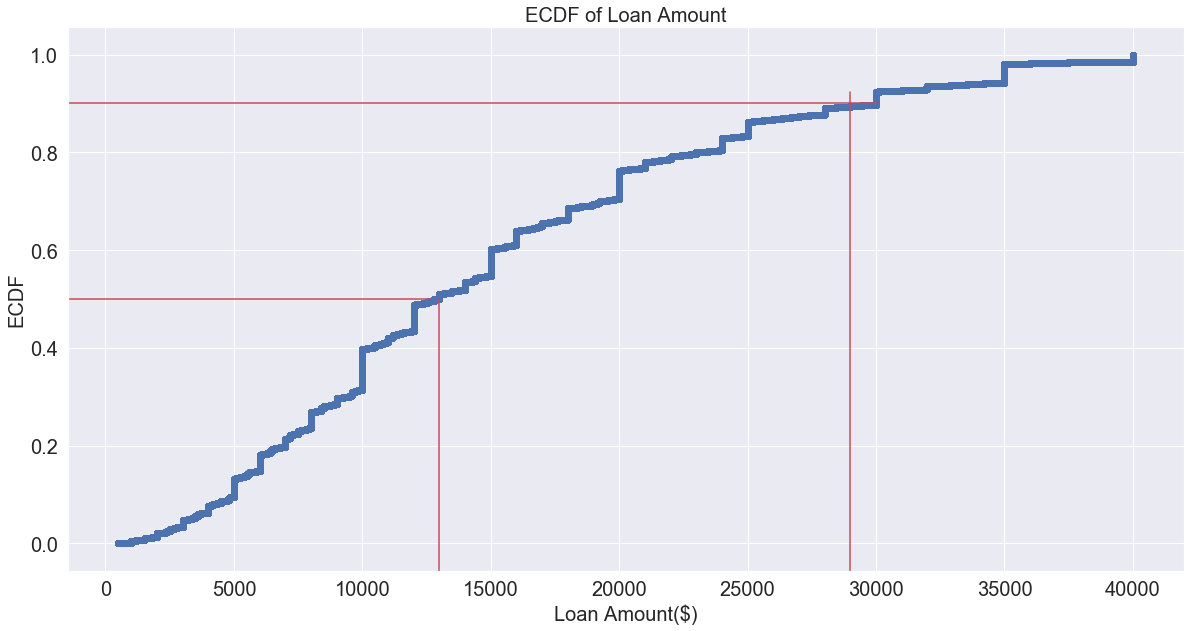

In [9]:
plt.figure(figsize=[20,10])
#plotting ecdf of interest rates
plt.scatter(x=loan_data.loan_amnt.sort_values().values, y=(np.arange(len(loan_data.loan_amnt.sort_values().values)))/len(loan_data.loan_amnt.sort_values().values));

#plotting labels
plt.xlabel("Loan Amount($)",size=20)
plt.xticks(size=20)

plt.ylabel("ECDF",size=20)
plt.yticks(size=20)

plt.title("ECDF of Loan Amount", size=20)

#marking the 50% and 90% ECDF
plt.axhline(0.5, color='r', xmax=13000/40000)
plt.axhline(0.9, color='r',xmax=29000/40000)

plt.axvline(13000,color='r',ymax=0.5)
plt.axvline(29000,color='r',ymax=0.88);

- 50% of Loans are less than USD 13,000
- 90% of loans are less than USD 29,000
- The largest loan is at USD 40,000 with the lowest loan at USD 500.
- There is a spike in loans at round numbers 10,000 ,20,000, 25,000 etc

# 2. Term of Loans

Expanding on the previous section, let's examine the term of the loans and compare it to the loan amount requested

In [15]:
print(str(np.round(loan_data.term.value_counts(normalize=True)[0]*100)) + "% of issued loans are 36 months") 
print(str(np.round(loan_data.term.value_counts(normalize=True)[1]*100)) + "% of issued loans are 60 months") 

71.0% of issued loans are 36 months
29.0% of issued loans are 60 months


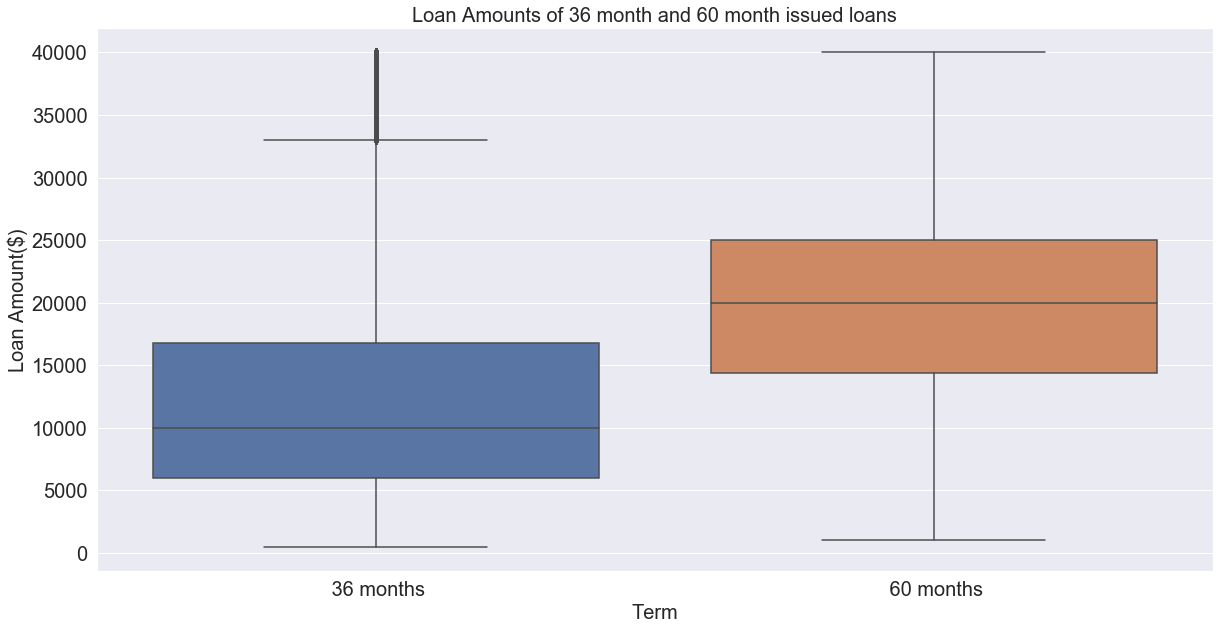

In [16]:
plt.figure(figsize=[20,10])
sns.boxplot(x=loan_data.term,y=loan_data.loan_amnt)

plt.title("Loan Amounts of 36 month and 60 month issued loans",size=20)

plt.xticks(size=20)
plt.yticks(size=20)

plt.xlabel('Term',size=20)
plt.ylabel('Loan Amount($)',size=20);

- The mean loan for a 60 month term is USD 20,000
- The mean loan for a 36 month term is USD 10,000
- The range for both terms is the same
- 36 month loans have a IQR between USD 6,000 AND usd 17,000
- 60 month loans have a IQR between USD 15,000 AND usd 25,000

# 3. Interest Rates

Let's analyze interest rates now...

In [41]:
feature_desc[feature_desc['LoanStatNew']=="int_rate"]['Description'].values

array(['Interest Rate on the loan'], dtype=object)

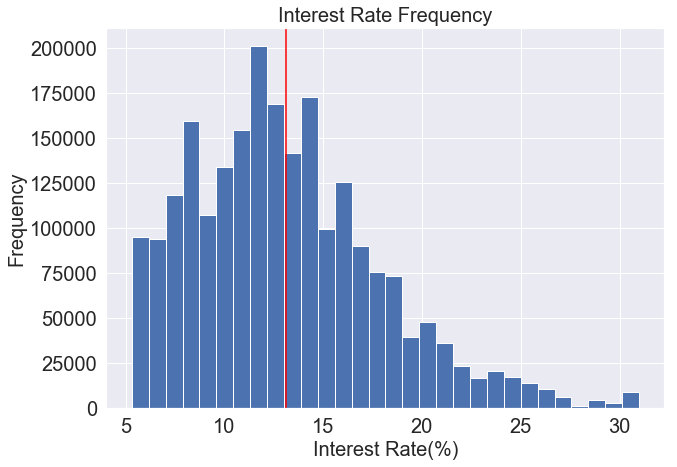

In [91]:
#plotting histogram on Interest rate distrbutions
plt.figure(figsize=[10,7])
plt.hist(loan_data.int_rate, bins=30)
plt.xticks(size=20)
plt.yticks(size=20)

#plot labels
plt.title("Interest Rate Frequency", size=20)
plt.xlabel("Interest Rate(%)",size=20)
plt.ylabel("Frequency",size=20)

plt.axvline(loan_data.int_rate.mean(), color='red');

- The most common interest occurs at around 12-13%
- The interest rate distribution tails to the right, similar to loan amounts.

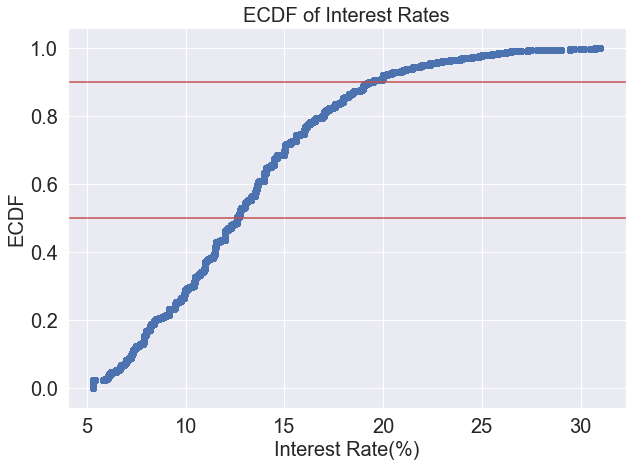

In [92]:
plt.figure(figsize=[10,7])
#plotting ecdf of interest rates
plt.scatter(x=loan_data.int_rate.sort_values().values, y=(np.arange(len(loan_data.int_rate.sort_values().values)))/len(loan_data.int_rate.sort_values().values));

#plotting labels
plt.xlabel("Interest Rate(%)",size=20)
plt.xticks(size=20)

plt.ylabel("ECDF",size=20)
plt.yticks(size=20)

plt.title("ECDF of Interest Rates", size=20)
plt.axhline(0.5, color='r')
plt.axhline(0.9, color='r');

- 50% of Loans are issued at 13% or less.
- 90% of Loans are issued at 20% or less.
- The maximum interest rate occurs at 32%
- The minimum interest rate occurs at 5%

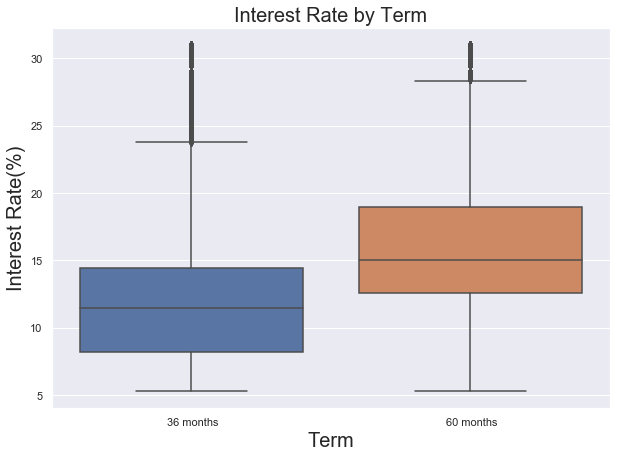

In [94]:
plt.figure(figsize=[10,7])
sns.boxplot(x=loan_data.term,y=loan_data.int_rate)

plt.title("Interest Rate by Term", size =20)
plt.xlabel("Term", size=20)
plt.ylabel("Interest Rate(%)", size=20);

# 60 vs 36 month Term

1. 36 months:
    - The IQR is between 7 and 14%.
    - The whisker edges are between 5% and 23%
    - The range is between 5% and 33%

2. 60 months:
    - The IQR is between 13% and 18%.
    - The whisker edges are between 5% and 27%
    - The range is between 5% and 33%

Let's examine some more detail by considering the loan amount..

In [ ]:
# Subset the dataset by term of loan 
_60_ = loan_data[loan_data.term==" 60 months"][:100000]
_36_ = loan_data[loan_data.term==" 36 months"][:100000]

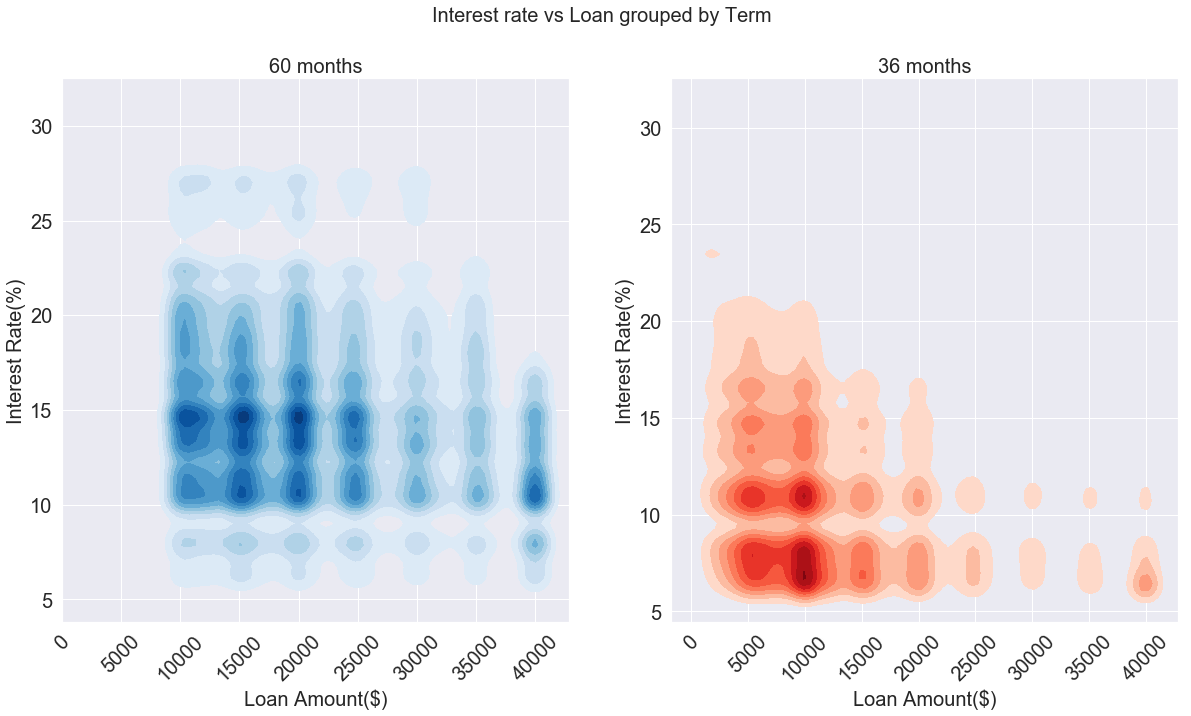

In [165]:
sns.set(style="darkgrid")
plt.figure(figsize=[20,10])
plt.suptitle("Interest rate vs Loan grouped by Term", size=20)

#60 months
plt.subplot(1,2,1)

sns.kdeplot(_60_.loan_amnt, _60_.int_rate,
                 cmap="Blues", shade=True, shade_lowest=False,label='60 months',n_levels=10)

plt.xticks(size=20,rotation=45)
plt.yticks(size=20)
plt.xlabel("Loan Amount($)", size=20)
plt.ylabel("Interest Rate(%)", size=20)
plt.title("60 months", size=20)

plt.xlim(left=0)

#36 Months
plt.subplot(1,2,2)
sns.kdeplot(_36_.loan_amnt, _36_.int_rate,
                 cmap="Reds", shade=True, shade_lowest=False,label='36 months',n_levels=10)
plt.xticks(size=20,rotation=45)
plt.yticks(size=20)
plt.xlabel("Loan Amount($)", size=20)
plt.ylabel("Interest Rate(%)", size=20)
plt.title("36 months", size=20);

# 60 vs 36 month Term

- 60 months:
    - USD9,000 seems to be where loans start getting issued. Most commonly at around 15%. 
    - Interest rates do not exceed 27%.
    - Interest rates range from 7% to 27%. The higher the loan value, the lower the interest rates range.
    - The highest concentration of loans are between 10,000 & 20,000 
    - The highest concentration of interest rates is between 10% and 17%
    
- 36 months:
    - The highest concentration of loans are between 8,000 & 12,000 
    - The highest concentration of interest rates is between 5% and 12%.
    - Loans start to significantly decrease after 20,000.
    

In general, the higher the loan the lower the interest rate.
A 10,000 loan over 36 months tends to have a lower interest rate than a 10,000 loan over 60 months.

In [166]:
print("The mean loan and interest rate for a 36 month term is $" + str(np.round(loan_data[loan_data.term==" 36 months"].loan_amnt.mean())) + " & "+ str(np.round(loan_data[loan_data.term==" 36 months"].int_rate.mean(),2)) +"%")
print("The mean loan and interest rate for a 60 month term is $" + str(np.round(loan_data[loan_data.term==" 60 months"].loan_amnt.mean())) + " & "+ str(np.round(loan_data[loan_data.term==" 60 months"].int_rate.mean(),2)) +"%")

The mean loan and interest rate for a 36 month term is $12746.0 & 11.95%
The mean loan and interest rate for a 60 month term is $20738.0 & 15.92%


In [167]:
print("The standard deviation for the loan amount for a 36 month loan is $" ,loan_data[loan_data.term==" 36 months"].loan_amnt.std())
print("The standard deviation for the loan amount for a 60 month loan is $" ,loan_data[loan_data.term==" 60 months"].loan_amnt.std())

The standard deviation for the loan amount for a 36 month loan is $ 8589.374023053018
The standard deviation for the loan amount for a 60 month loan is $ 8086.355178608585


# 4. Installments

How are Installments and Loan values related? 

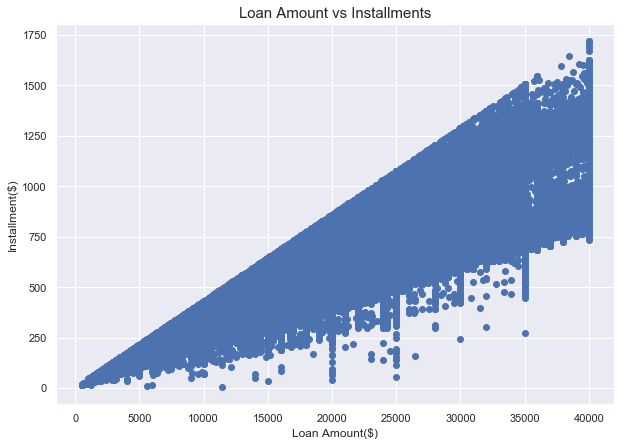

In [96]:
plt.figure(figsize=[10,7])

plt.scatter(loan_data.loan_amnt,loan_data.installment)

plt.title("Loan Amount vs Installments", size=15)
plt.xlabel("Loan Amount($)")
plt.ylabel("Installment($)");

- There is a linearly increasing ceiling for installments which indicates a direct relationship between installments and loan amounts. 
- As the loan amount increase the variability of the installment amount increases.
Example:
- The maximum installment issued for a USD10,000 loan is around USD500 and a minimum installment of USD100. A $400 range.
- The maximum installment issued for a USD40,000 loan is around USD1,750 and a minimum installment of USD750. A USD1,000 range.

Can we divide it by term?

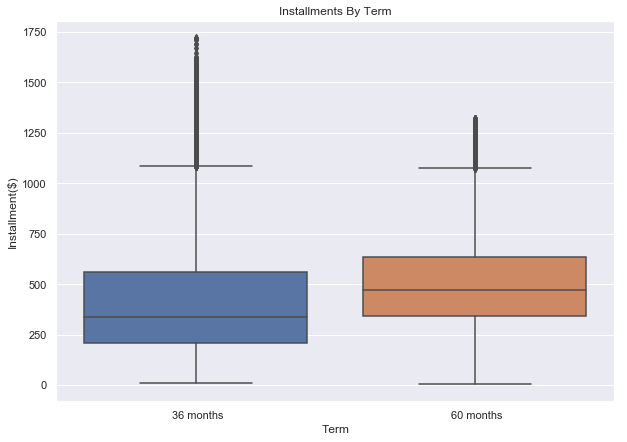

In [100]:
plt.figure(figsize=[10,7])
sns.boxplot(x=loan_data.term,y=loan_data.installment)

plt.title("Installments By Term")
plt.xlabel("Term")
plt.ylabel("Installment($)");

- 36 months has a range of installments between 0 and 1750 dollars 
- 60 months has a  range of installments between 0 and 1300 dollars 
- 36 months has an IQR between 230 and 550. 
- 60 months has an IQR between 300 and 650.

36 months has a wider range of installments than 60 months but the on average 60 months pay more every installment.
Let's integrate loan amount in the above graph.

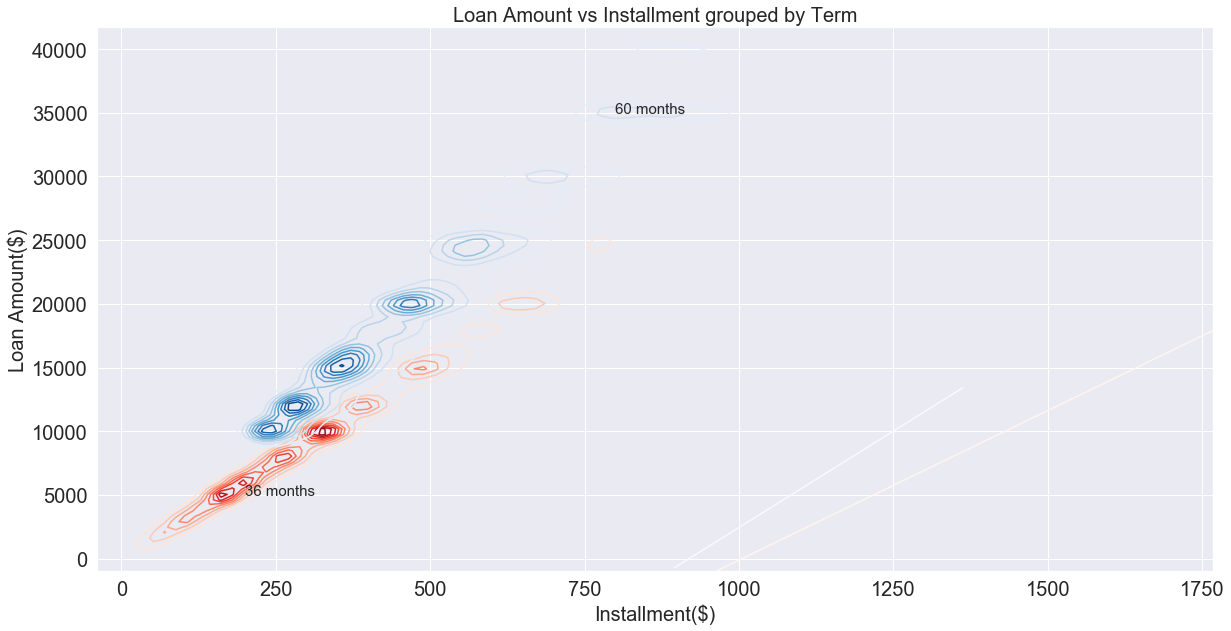

In [98]:
sns.set(style="darkgrid")
plt.figure(figsize=[20,10])

# Subset the dataset by term of loan 
_36_ = loan_data[loan_data.term==" 36 months"]
_60_ = loan_data[loan_data.term==" 60 months"]


# Draw the two density plots
sns.kdeplot( _36_.installment,_36_.loan_amnt,
                 cmap="Reds", shade=False, shade_lowest=False,label='36 months',n_levels=10)
sns.kdeplot(_60_.installment,_60_.loan_amnt,
                 cmap="Blues", shade=False, shade_lowest=False,label='60 months',n_levels=10)

#labelling
plt.xlabel("Installment($)", size=20)
plt.ylabel("Loan Amount($)", size=20)
plt.title("Loan Amount vs Installment grouped by Term", size=20)

plt.xticks(size=20)
plt.yticks(size=20)

plt.text(800, 35000, "60 months", size=15,)
plt.text(200, 5000, "36 months", size=15);

For the same loan amount, 36 months higher installments than 60 months as can be seen above.

# 5. Grade and Subgrade

In [169]:
feature_desc[feature_desc['LoanStatNew']=="grade"]

,LoanStatNew,Description
25,grade,LC assigned loan grade


LC assigned loan grade = Lending Club Assigned loan grade.
The grade is decided based on factors that can be discovered later..

How does interest rate change with grade of the loans?

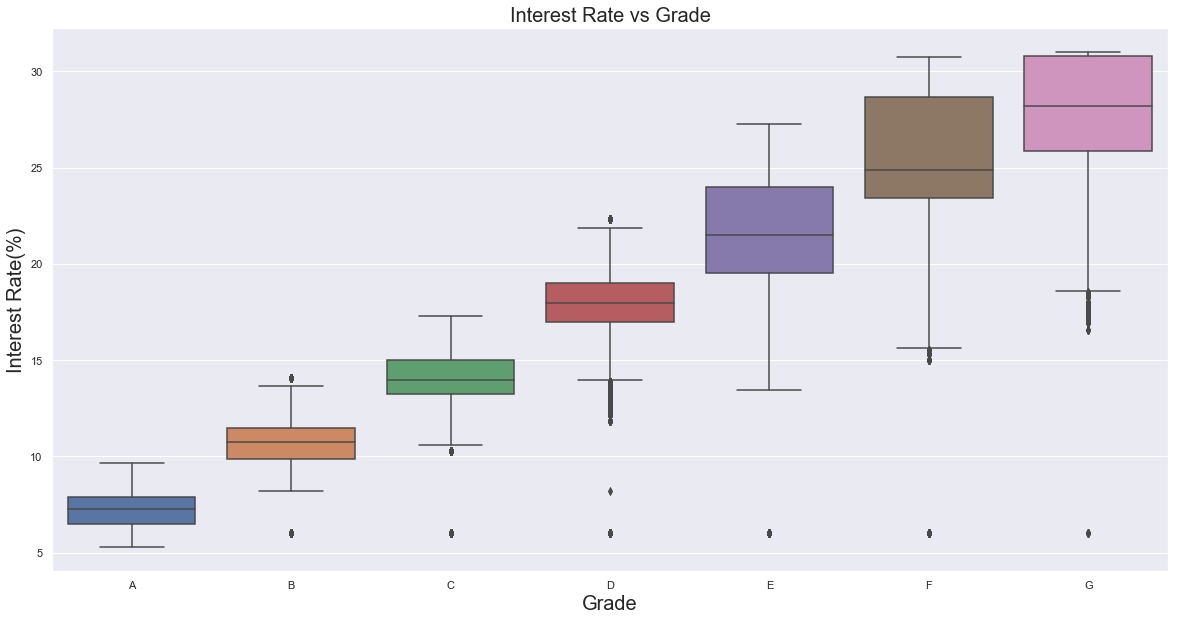

In [101]:
plt.figure(figsize=[20,10])
sns.boxplot(x=loan_data.grade,y=loan_data.int_rate, order=['A','B','C','D','E','F','G'])

plt.title("Interest Rate vs Grade",size=20)
plt.xlabel("Grade", size=20)
plt.ylabel("Interest Rate(%)", size=20);

- We see that interest rate is highly dependant on the grade assigned.
- There exists a few outliers in the data.

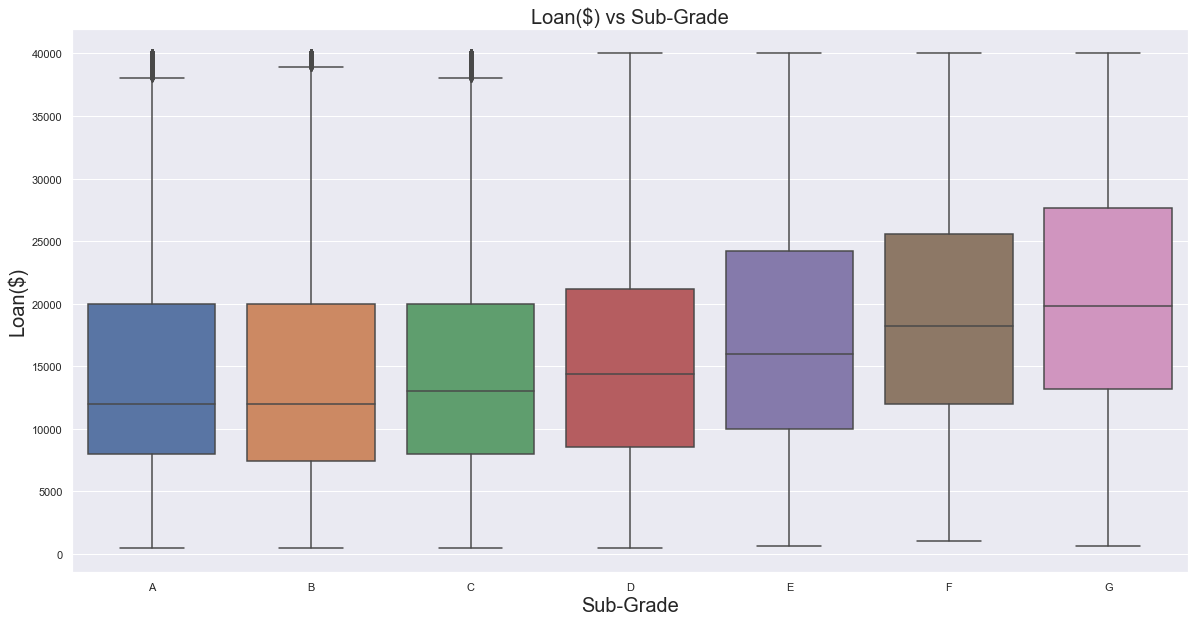

In [102]:
plt.figure(figsize=[20,10])
sns.boxplot(x=loan_data.grade,y=loan_data.loan_amnt, order=['A','B','C','D','E','F','G'])

plt.title("Loan($) vs Sub-Grade",size=20)
plt.xlabel("Sub-Grade", size=20)
plt.ylabel("Loan($)", size=20);

We see that grade and loan amount start having a correlation starting from grade D based on this chart.

Let's dig deeper and look at how subgrades change interest rates.

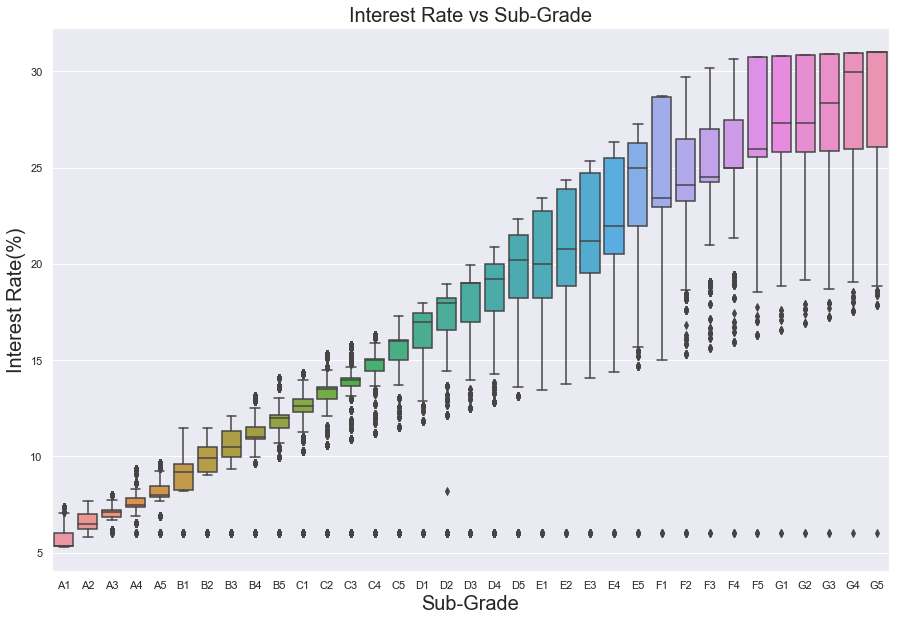

In [105]:
plt.figure(figsize=[15,10])
sns.boxplot(x=loan_data.sub_grade,y=loan_data.int_rate, order=['A1','A2','A3','A4','A5',
                                                                'B1','B2','B3','B4','B5',
                                                               'C1','C2','C3','C4','C5',
                                                               'D1','D2','D3','D4','D5',
                                                               'E1','E2','E3','E4','E5',
                                                               'F1','F2','F3','F4','F5',
                                                               'G1','G2','G3','G4','G5']);

plt.title("Interest Rate vs Sub-Grade",size=20)
plt.xlabel("Sub-Grade", size=20)
plt.ylabel("Interest Rate(%)", size=20);

- As subgrade deteriorates, not only does the interest rate increase, but the range increases as well.
- Ex:
     - A B4 loan has a range between 10-13%
     - An E4 loan has a range between 14-26%.

This shows a huge increase in range and variability

# 6. Employment Information

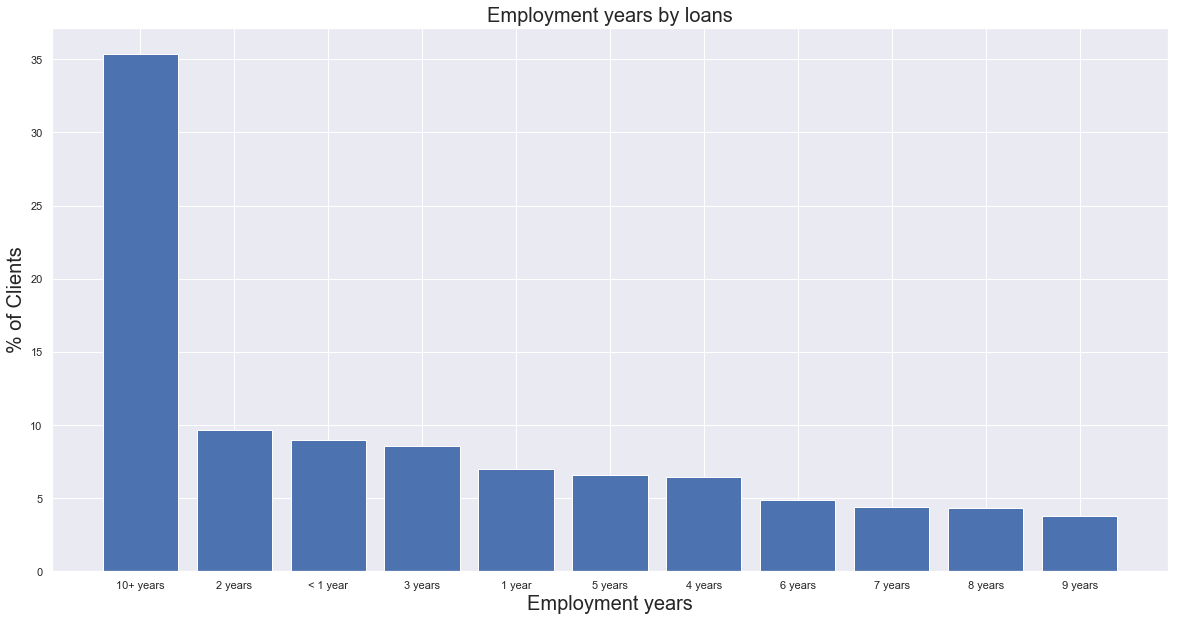

In [115]:
plt.figure(figsize=[20,10])
plt.bar(x=loan_data.emp_length.value_counts(normalize=True).index, height=loan_data.emp_length.value_counts(normalize=True)*100)

plt.xlabel("Employment years", size=20)
plt.ylabel("% of Clients", size=20)
plt.title("Employment years by loans", size=20);

- 35% of Loanees have been working for 10+ years
- 65% have been working less than 10 years as seen in the above graph.

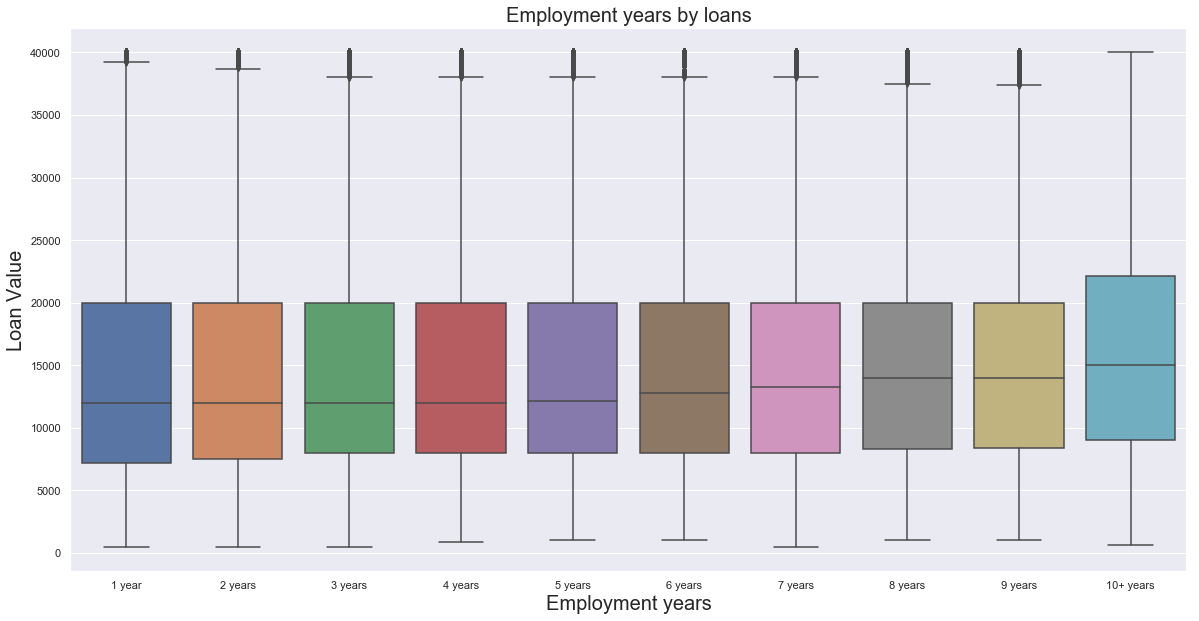

In [106]:
plt.figure(figsize=[20,10])
sns.boxplot(x=loan_data.emp_length,y=loan_data.loan_amnt, order=['1 year',
                                                                '2 years',
                                                                 '3 years',
                                                                 '4 years',
                                                                 '5 years',
                                                                 '6 years',
                                                                 '7 years',
                                                                 '8 years',
                                                                 '9 years','10+ years'
                                                                ])
plt.xlabel("Employment years", size=20)
plt.ylabel("Loan Value", size=20)
plt.title("Employment years by loans", size=20);

- The IQR for those employed for 10+ years is between USD9,000 and USD 23,000 and there are not any signicant outliers as all loans fall below 1.5*IQR.

- The IQR for those working for less than 10 years is between USD8,000 and USD 20,000.

Let's plot the mean loans for each employment year to see if there is a trend.

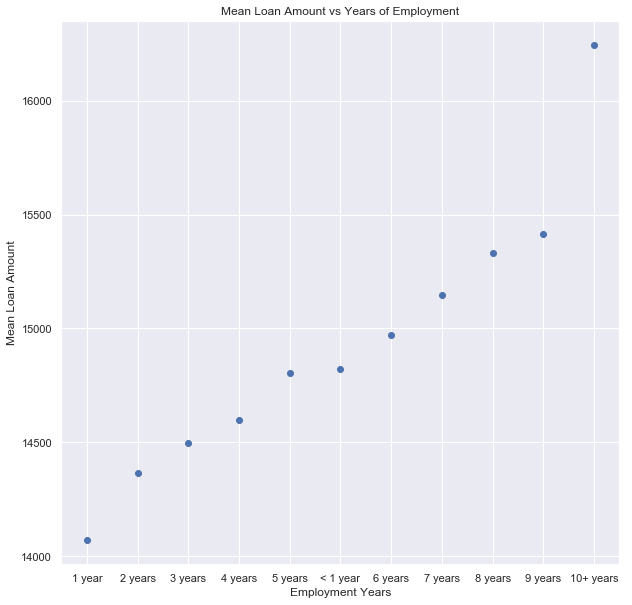

In [63]:
plt.figure(figsize=[10,10])
plt.scatter(x=loan_data.groupby("emp_length")['loan_amnt'].mean().sort_values().index,
        y=loan_data.groupby("emp_length")['loan_amnt'].mean().sort_values().values)

plt.xlabel("Employment Years")
plt.ylabel("Mean Loan Amount")
plt.title("Mean Loan Amount vs Years of Employment");

- There is a gradual increase loan values as the number of employment years is higher.
- There is an interesting observation. Those with <1 year of emplyment have loans of those with 5 and 6 years of experience. These might be students taking out loans for education and living expenses.

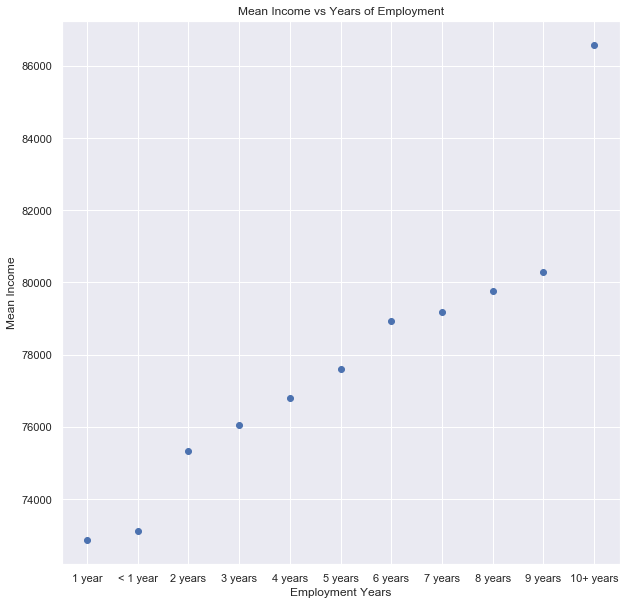

In [65]:
plt.figure(figsize=[10,10])
plt.scatter(x=loan_data.groupby("emp_length")['annual_inc'].mean().sort_values().index,
        y=loan_data.groupby("emp_length")['annual_inc'].mean().sort_values().values)

plt.xlabel("Employment Years")
plt.ylabel("Mean Income")
plt.title("Mean Income vs Years of Employment");

We see a direct relationship between years of employment and annual income. 

# 7. Home Ownership

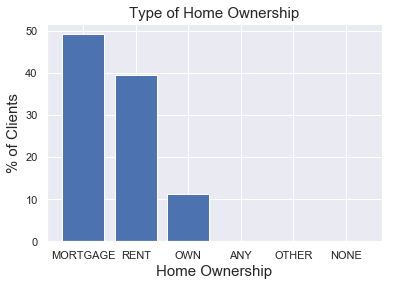

In [110]:
plt.bar(x=loan_data.home_ownership.value_counts(normalize=True).index,
       height=loan_data.home_ownership.value_counts(normalize=True).values*100)

plt.title("Type of Home Ownership",size=15)
plt.xlabel("Home Ownership", size=15)
plt.ylabel("% of Clients", size=15);

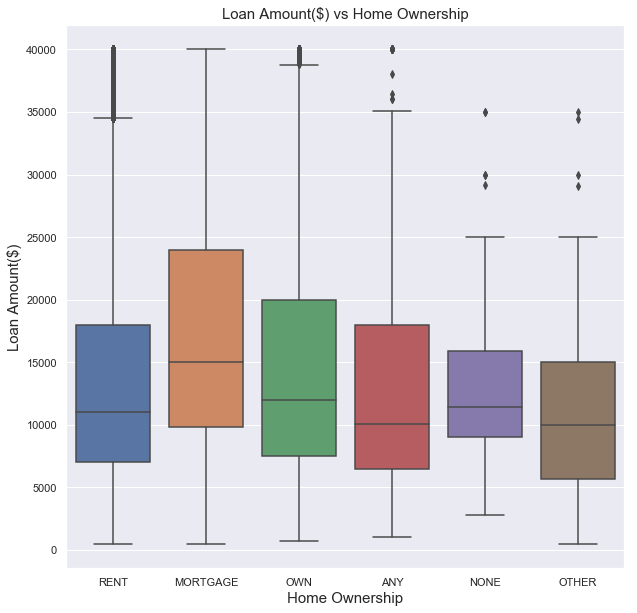

In [112]:
plt.figure(figsize=[10,10])
sns.boxplot(x=loan_data.home_ownership,y=loan_data.loan_amnt)

plt.title("Loan Amount($) vs Home Ownership",size=15)
plt.xlabel("Home Ownership",size=15)
plt.ylabel("Loan Amount($)",size=15);

- Those that have a mortgage tend to ask for signifcantly higher loan amounts.

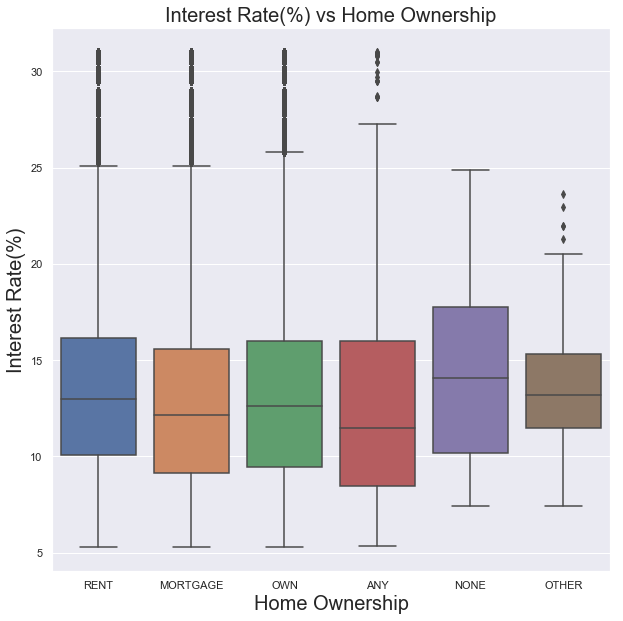

In [113]:
plt.figure(figsize=[10,10])
sns.boxplot(x=loan_data.home_ownership,y=loan_data.int_rate)
plt.title("Interest Rate(%) vs Home Ownership",size=20)
plt.ylabel("Interest Rate(%)",size=20)
plt.xlabel("Home Ownership",size=20);

Home Ownership does not signifcantly affect interest rate.

# 8.Payment plan

In [251]:
feature_desc[feature_desc['LoanStatNew']=='pymnt_plan'].values

array([['pymnt_plan',
        'Indicates if a payment plan has been put in place for the loan']],
      dtype=object)

In [246]:
np.sum(loan_data.pymnt_plan=='y')

682

This value is extremely insignificant

# 9. Loan Status Analysis (Amount, grade, home ownership,installment)

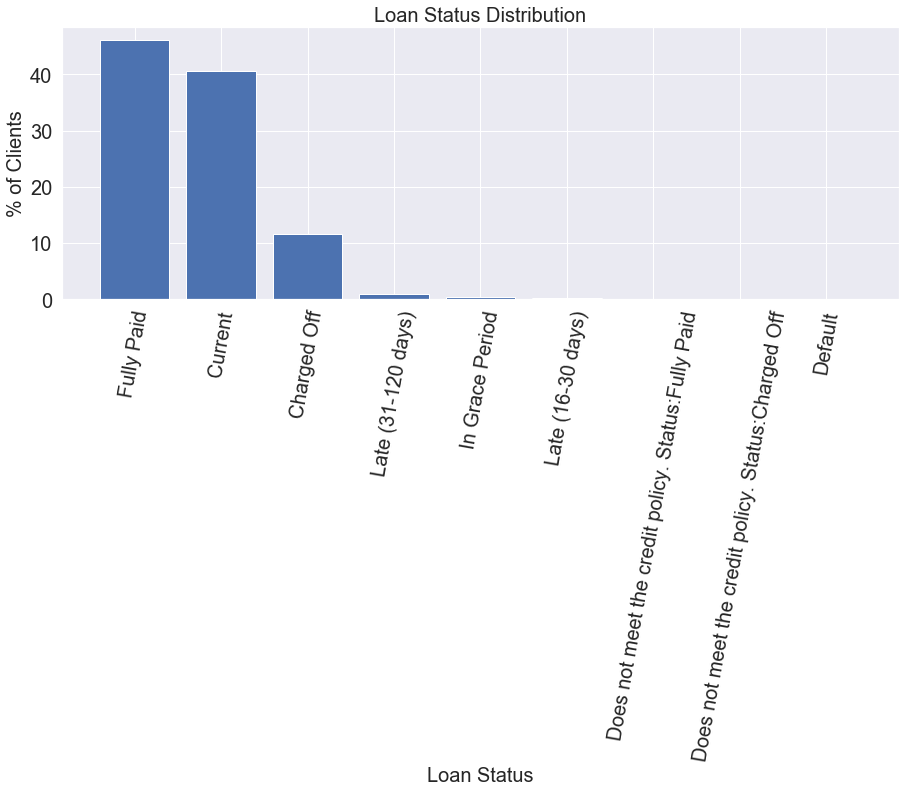

In [116]:
plt.figure(figsize=[15,5])
plt.bar(x=loan_data['loan_status'].value_counts().index, height=loan_data['loan_status'].value_counts(normalize=True)*100)
plt.xticks(rotation=80, size=20)
plt.yticks(size=20)

plt.title("Loan Status Distribution", size=20)
plt.xlabel("Loan Status",size=20)
plt.ylabel("% of Clients",size=20);

According to Lending Loan Club(https://www.lendingclub.com/info/demand-and-credit-profile.action), default is define as loans late by 120+ days. Let's examine all late loans.

In [117]:
grace=np.sum(loan_data.loan_status=='In Grace Period')
_16_30_days_late=np.sum(loan_data.loan_status=='Late (16-30 days)')
_31_120_days_late=np.sum(loan_data.loan_status=='Late (31-120 days)')
default=np.sum(loan_data.loan_status=='Default')

In [118]:
late=loan_data[(loan_data.loan_status=='In Grace Period')|(loan_data.loan_status=='Late (16-30 days)')|(loan_data.loan_status=='Late (31-120 days)')|(loan_data.loan_status=='Default')]

In [119]:
late_count=grace+ _16_30_days_late + _31_120_days_late + default

In [120]:
print("There are " + str(late_count) + " Default Loans out of " + str(len(loan_data)) + " loans.")
print("This is " + str(late_count*100/len(loan_data)) + "% of total loans ")

There are 34617 Default Loans out of 2260668 loans.
This is 1.5312730573441125% of total loans 


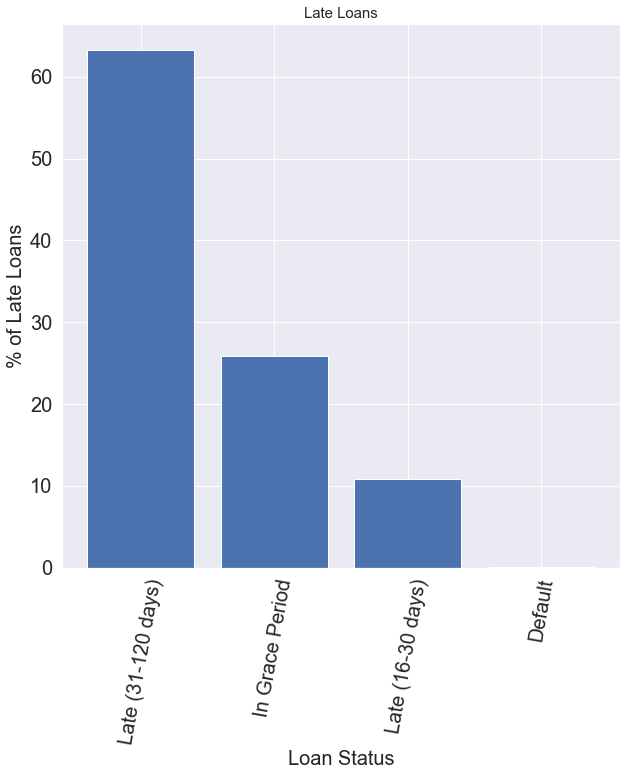

In [121]:
plt.figure(figsize=[10,10])
plt.bar(x=late.loan_status.value_counts().index, height=late.loan_status.value_counts(normalize=True)*100)

plt.title("Late Loans",size=15)
plt.xlabel("Loan Status", size=20)
plt.ylabel("% of Late Loans", size=20)
plt.xticks(rotation=80, size=20)
plt.yticks(size=20);

- Most Late loans are between 31-120 days
- Deafault loans are negligible

In [123]:
all_vs_late_loans=pd.DataFrame({"All Loans":loan_data.term.value_counts(normalize=True).values*100,
              "Late Loans":late.term.value_counts(normalize=True).values*100},
             index=loan_data.term.value_counts(normalize=True).index)

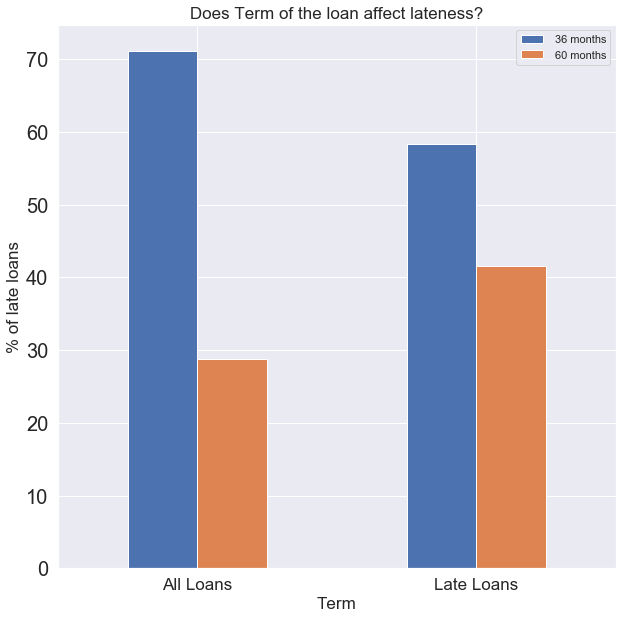

In [134]:
all_vs_late_loans.T.plot.bar(figsize=(10,10))

plt.title("Does Term of the loan affect lateness?",size=17)
plt.ylabel("% of late loans",size=17)
plt.xlabel("Term",size=17)

plt.xticks(size=17, rotation=360)
plt.yticks(size=20);

- 60 months loans made up 28% of all loans but made up 42% of late Loans
- 36 months loans made up 72% of all loans but made up 57% of late loans.

We see that the term of the loan affects the lateness of the loan.

Lets's compare the average interest rates and loan amounts for late loans and all loans.

In [90]:
print(loan_data.loan_amnt.mean(),loan_data.int_rate.mean())
print(late.loan_amnt.mean(), late.int_rate.mean())

15046.931227849467 13.09291294419326
16997.032527370946 15.561665366725697


The average amount of all loans is 15,000 dollars.
The average amount of late loans 17,000 dollars.

The average interest rate of all loans is 13.1% 
The average interest rate of late loans is 15.6% 

We can see that loan amount and interest rate can play a role in  predicitng lateness.

# 10. Purpose of Loan Analysis

In [136]:
purpose_all=pd.DataFrame({"All Loans":loan_data.purpose.value_counts(normalize=True)*100})
purpose_late=pd.DataFrame({"Late Loans":late.purpose.value_counts(normalize=True)*100})

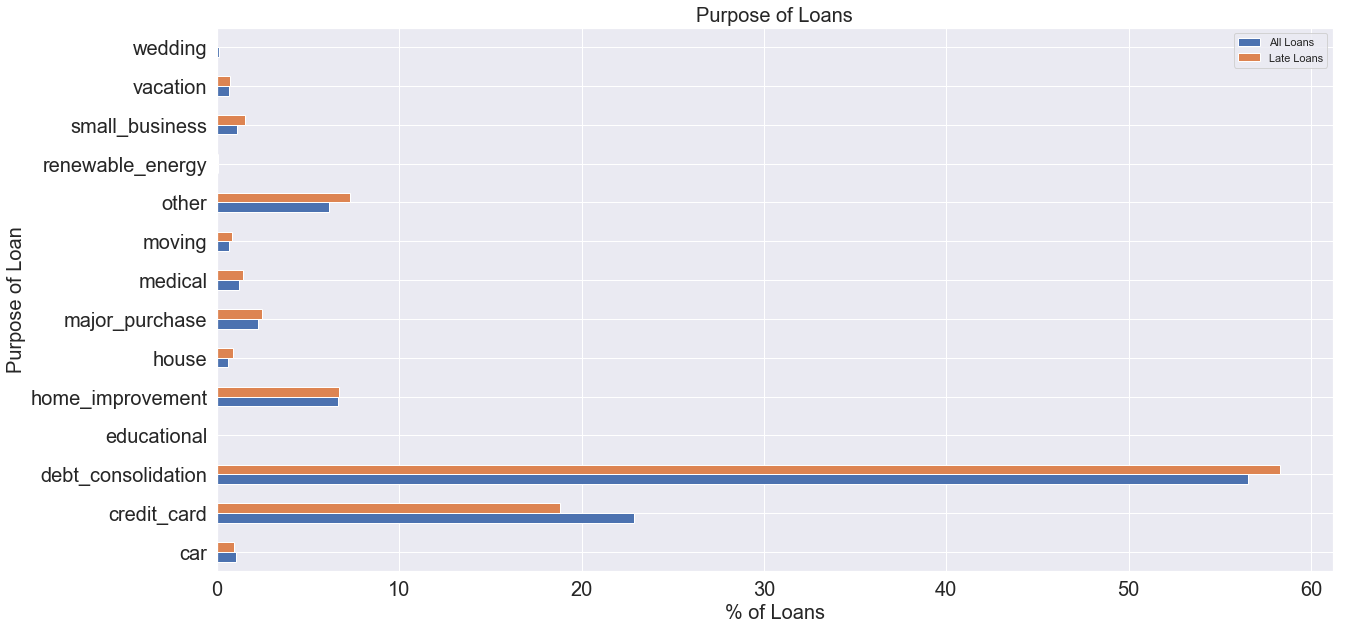

In [138]:
purpose_all.merge(purpose_late,left_index=True, right_index=True, how='outer').plot.barh(figsize=(20,10))

plt.title("Purpose of Loans",size=20)
plt.xlabel("% of Loans",size=20)
plt.ylabel("Purpose of Loan",size=20)

plt.xticks(size=20)
plt.yticks(size=20);

- We see a majority of loans requested for debt consolidation at 55-60%%
- Loans used to pay Credit card is around 17-23% 
- Loans used for home improvement purposes use around 7-8% of loans. 
- Loans for Credit card decreased from being 23% for all loans to being 17% of late loans.

Does the purpose change the loan amount or interest rate?

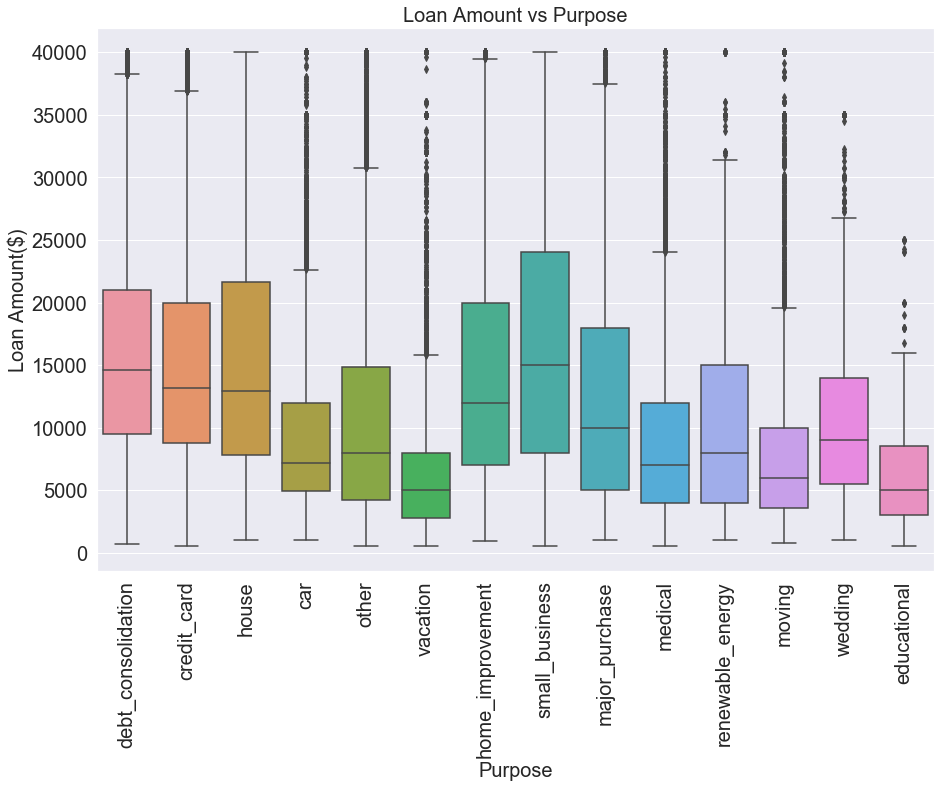

In [139]:
plt.figure(figsize=[15,10])
sns.boxplot(x=loan_data.purpose, y=loan_data.loan_amnt)

plt.xticks(size=20, rotation=90)
plt.yticks(size=20)

plt.title("Loan Amount vs Purpose",size=20)
plt.ylabel('Loan Amount($)', size=20)
plt.xlabel('Purpose', size=20);

- On average,Loan amounts is highest for small businesses.
- On average, Loan amounts is lowest for vacations.

# 11. Location Analysis

Let's see how loan counts change by state

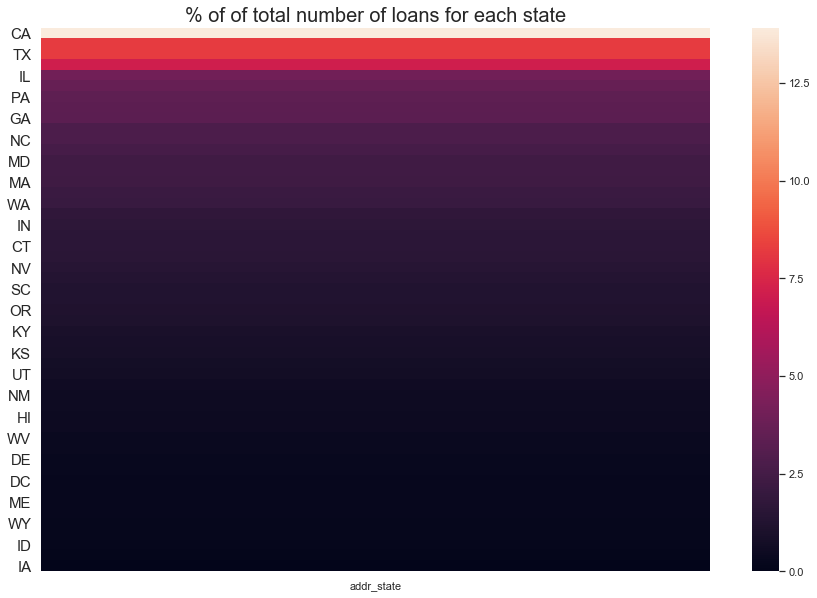

In [140]:
plt.figure(figsize=[15,10])
sns.heatmap(pd.DataFrame(loan_data.addr_state.value_counts(normalize=True))*100)

plt.yticks(rotation=0,size=15)
plt.title("% of of total number of loans for each state",size=20);

We see that california has significantly higher Loans than any other at around 13% of all loans

Let's see how the average loan value multiplied by number of loans changes by state

In [147]:
state_mean_loan=loan_data.groupby("addr_state")["loan_amnt"].mean()
state_loan_count=loan_data.groupby("addr_state")["loan_amnt"].count()
state_loan_sum=loan_data.groupby("addr_state")["loan_amnt"].sum()

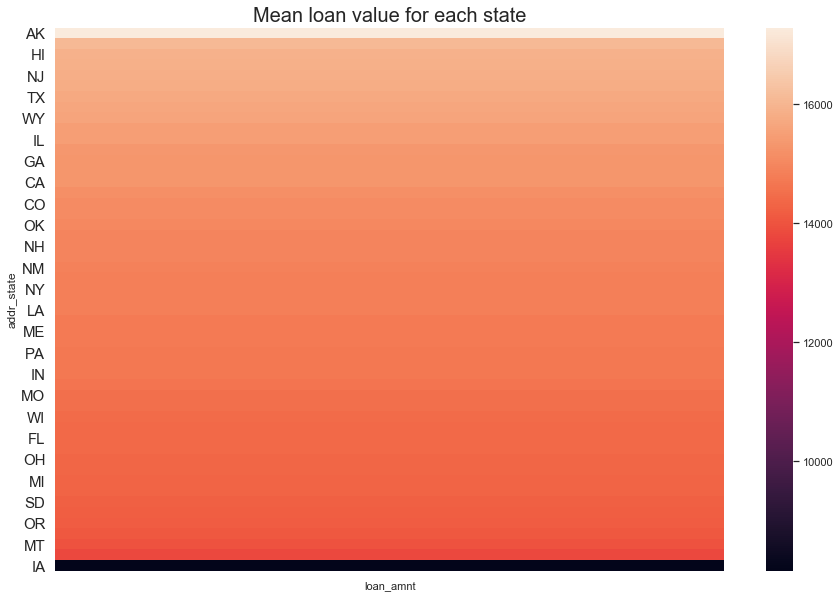

In [150]:
plt.figure(figsize=[15,10])
sns.heatmap(pd.DataFrame(state_mean_loan).sort_values(by="loan_amnt", ascending=False))

plt.yticks(rotation=0,size=15)
plt.yticks(rotation=0,size=15)
plt.title("Mean loan value for each state",size=20);

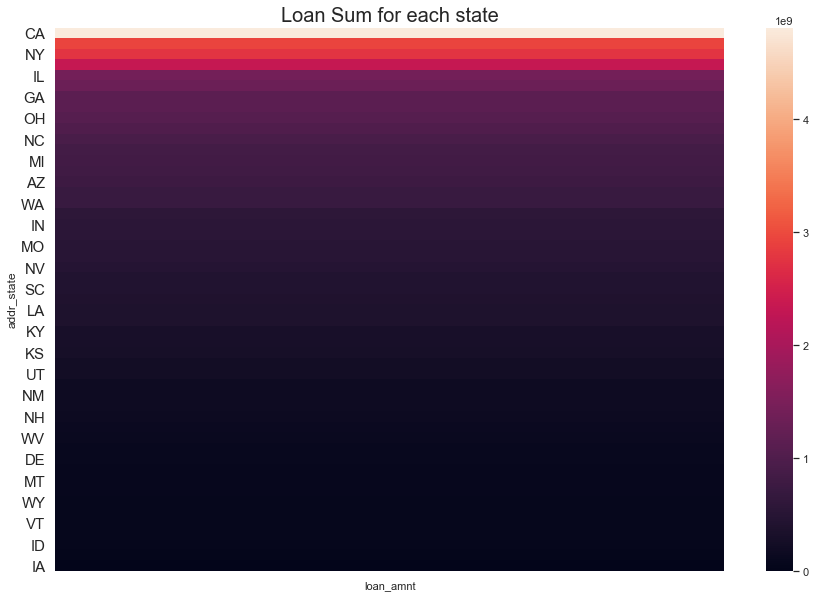

In [152]:
plt.figure(figsize=[15,10])
sns.heatmap(pd.DataFrame(state_loan_sum).sort_values(by="loan_amnt", ascending=False))

plt.yticks(rotation=0,size=15)
plt.yticks(rotation=0,size=15)
plt.title("Loan Sum for each state",size=20);

We see that California and New york have significantly higher volume of loans than other locations.

# 12. How have features changed with time

In order to analyze the issue dates, the dates will need to be converted from a string to a datetime object.

In [10]:
issue_d=pd.to_datetime(loan_data.issue_d)
loan_data['issue_date']=issue_d
new_df=loan_data.set_index('issue_date')

Let's starts with the number of loans.

In [21]:
loan_count_by_month=new_df.resample("M")['loan_amnt'].count()

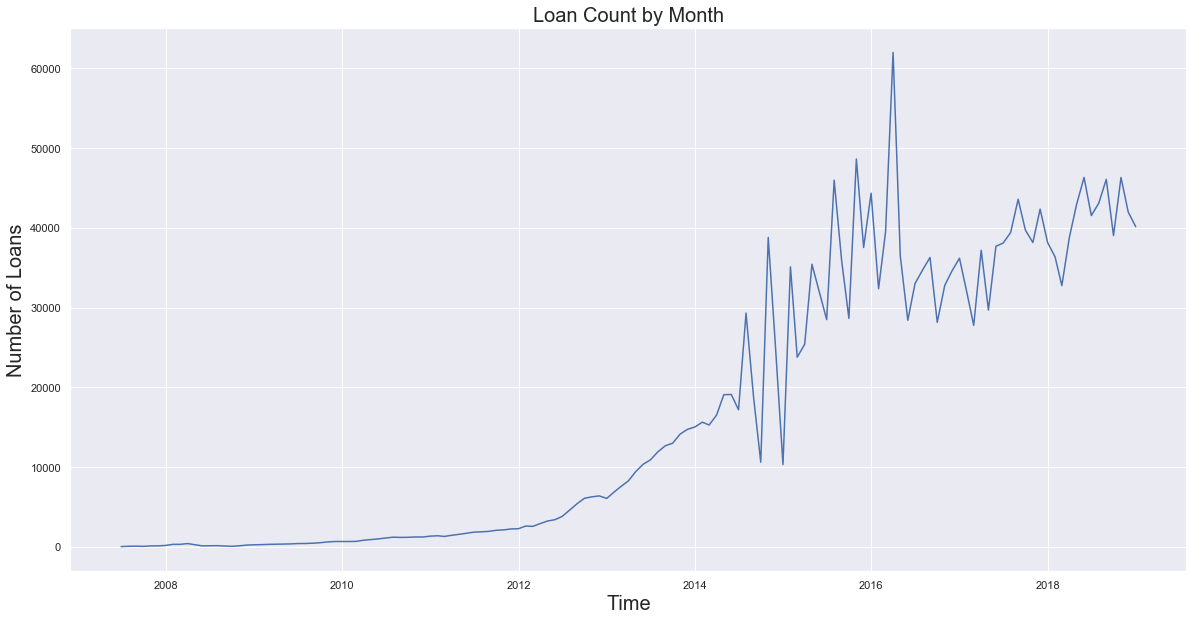

In [153]:
plt.figure(figsize=[20,10])

plt.plot(loan_count_by_month)

plt.title("Loan Count by Month",size=20)
plt.ylabel("Number of Loans",size=20)
plt.xlabel("Time", size=20);

Observations:

- It took 6-7 years(2007-2013) for the number of loans to go from 0 to 10,000. The increase was steady with no fluctuations month to month.
- It took 2-3 years (2013-2015) for the number of loans to go from 10,000 to 20,000.T he increase was steady with no fluctuations month to month.
- It took 1-2 year(2015-2016) year to go from 20,000 to 60,000 loans. But there was severe fluctuations month to month.
- There was a peak of loans in 2016 but then decreased rapidly to 30,000 issued loans.

How about the mean loan amount?

In [28]:
loan_mean_by_month=new_df.resample("M")['loan_amnt'].mean()

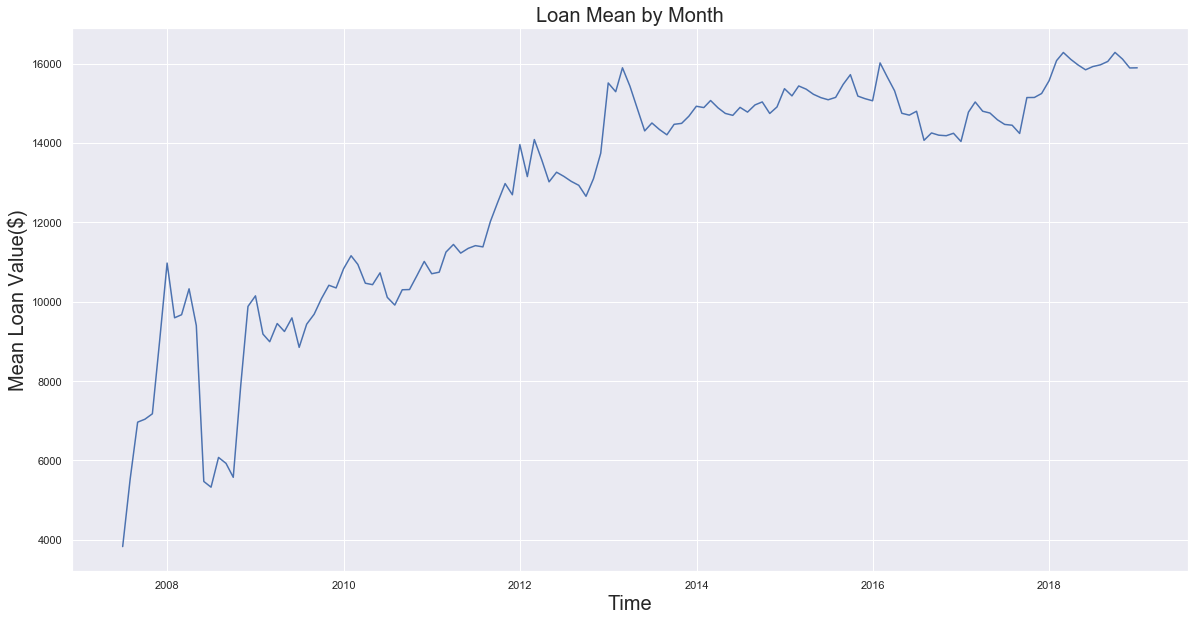

In [29]:
plt.figure(figsize=[20,10])

plt.plot(loan_mean_by_month)

plt.title("Loan Mean by Month",size=20)
plt.ylabel("Mean Loan Value($)",size=20)
plt.xlabel("Time", size=20);

The mean loan value seems to have steadily increased from 2007 to 2012, flattening at around $15-16,000 per loan.

How about the interest rate change?

In [30]:
int_rate_mean_by_month=new_df.resample("M")['int_rate'].mean()

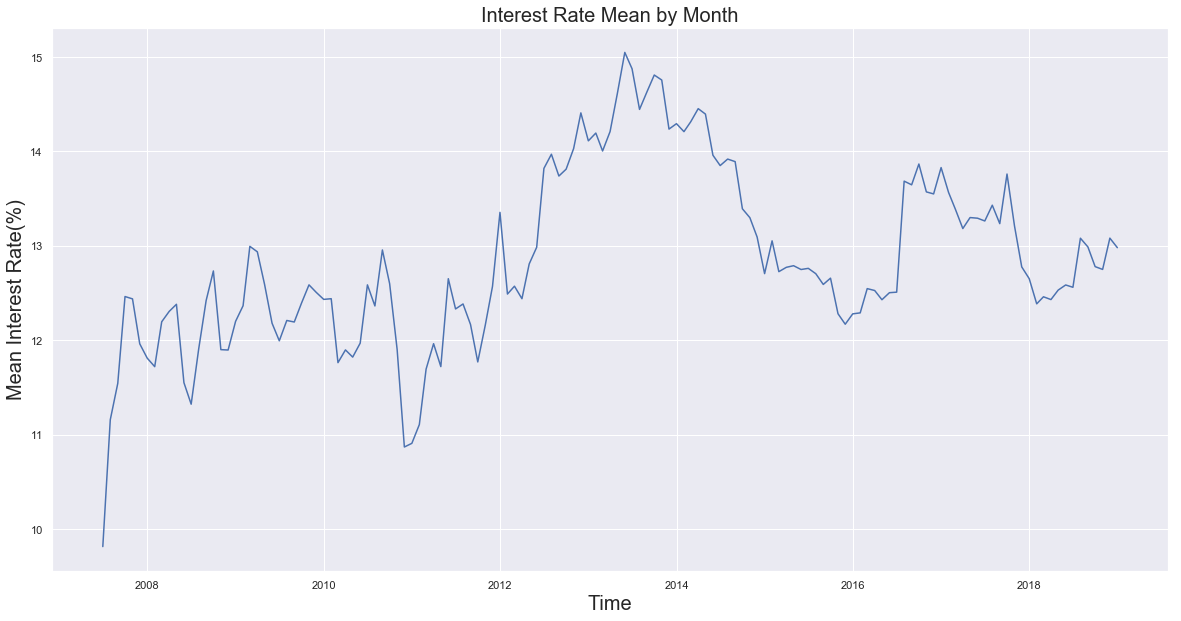

In [32]:
plt.figure(figsize=[20,10])

plt.plot(int_rate_mean_by_month)

plt.title("Interest Rate Mean by Month",size=20)
plt.ylabel("Mean Interest Rate(%)",size=20)
plt.xlabel("Time", size=20);

- Interest rates were steady between 2008 and 2012 ranging between 11-13%.
- Interest rates increased from 2012 to 2014 reaching a peak of 15%.
- They then decreased to 12% reaching a low in 2016.

Was the increase in number of loans due to low interest rates?

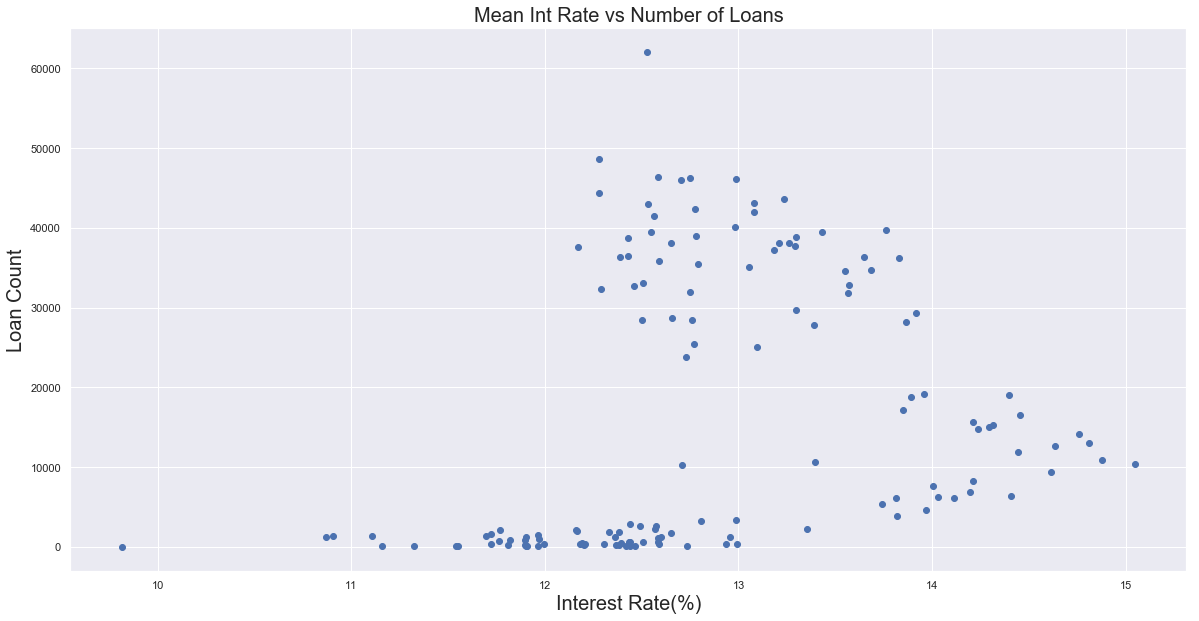

In [38]:
plt.figure(figsize=[20,10])

plt.scatter(x=int_rate_mean_by_month, y=loan_count_by_month)

plt.title("Mean Int Rate vs Number of Loans", size=20)
plt.ylabel("Loan Count",size=20)
plt.xlabel("Interest Rate(%)", size=20);

- There are two observations evident. 
- 1st Trend: We see negative relationship from 12% to 15% fot most of the months.
- 2nd Trend: We see a flat rlationship between 9-13% for a very low number of loans. 

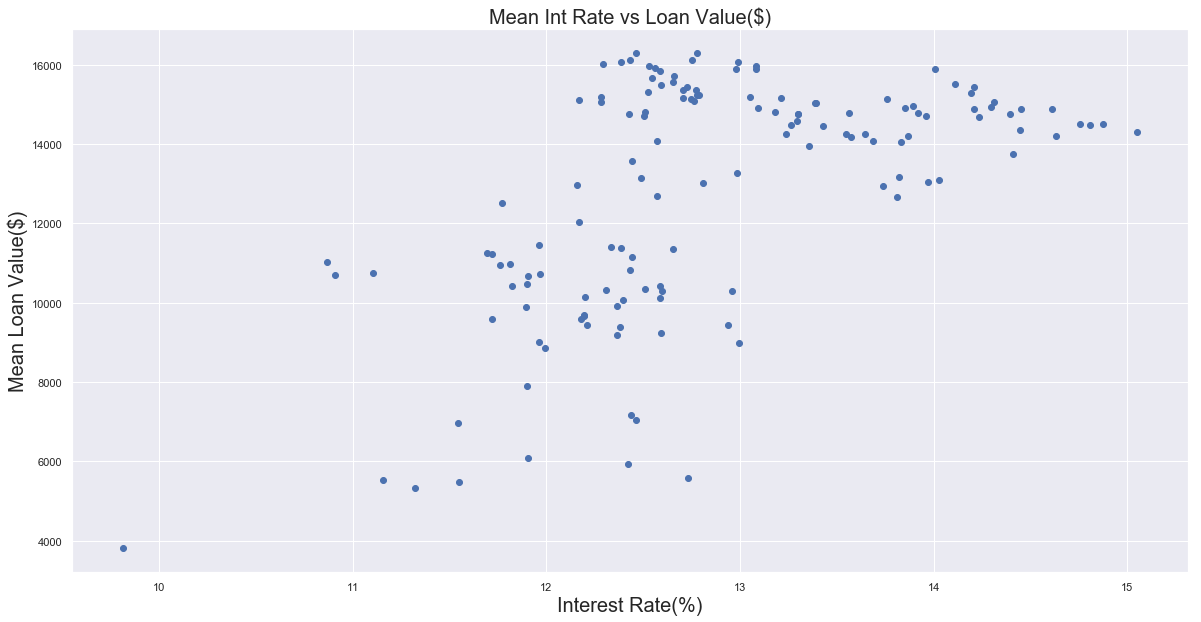

In [39]:
plt.figure(figsize=[20,10])

plt.scatter(x=int_rate_mean_by_month, y=loan_mean_by_month)

plt.title("Mean Int Rate vs Loan Value($)", size=20)
plt.ylabel("Mean Loan Value($)",size=20)
plt.xlabel("Interest Rate(%)", size=20);

- There is a strong positive relationship between loan value and interest rate for loans between 4,000 and 16,000.

In [63]:
new_df['36']=new_df['term'].map({' 36 months':1})
new_df['60']=new_df['term'].map({' 60 months':1})

In [82]:
monthly_60=new_df['60'].resample("M").sum()
monthly_36=new_df['36'].resample("M").sum()

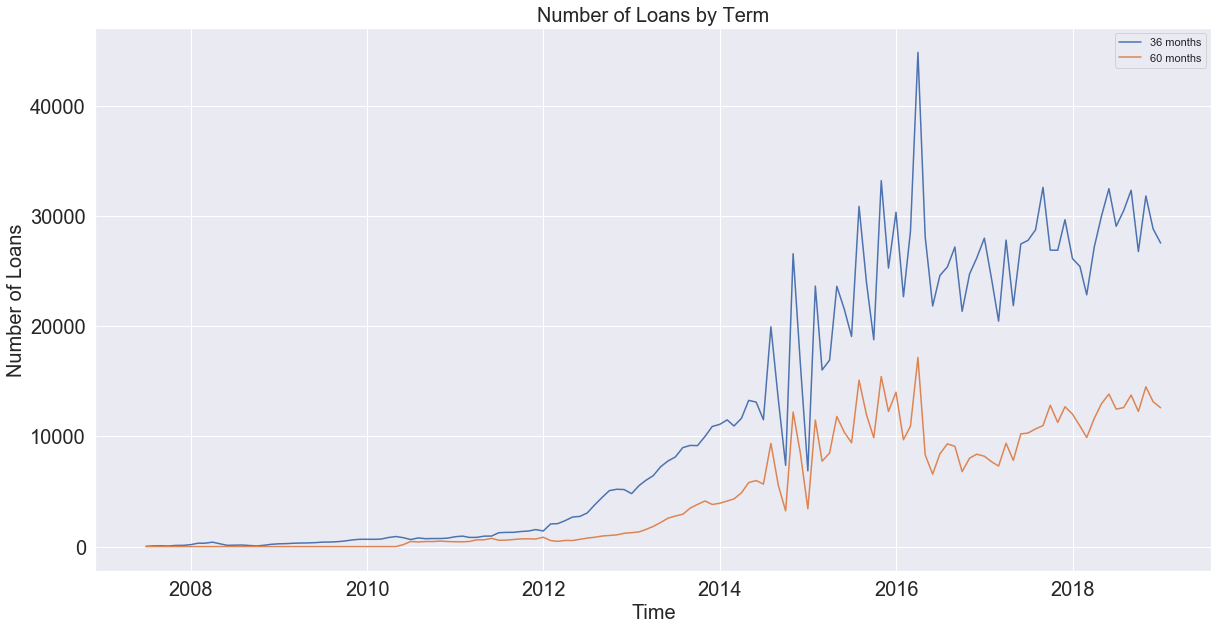

In [90]:
plt.figure(figsize=[20,10])

plt.plot(monthly_36, label="36 months")
plt.plot(monthly_60, label="60 months")

plt.title("Number of Loans by Term",size=20)
plt.xlabel("Time",size=20)
plt.ylabel("Number of Loans", size=20)

plt.xticks(size=20)
plt.yticks(size=20)
plt.legend();

The pattern of change for both terms of loans are similar but there is an evident difference of distribution as examined previously.

# 13. Are there significant correlations between the numeric variables in the dataframe?

The aim of this question is to visualize if there are significant correlations with pearson correlation coefficients with magnitudes greater than 0.7.

We do not aim to further examine these correlations, but just to see if they exist.

In [35]:
correlations=loan_data.corr().dropna(how='all')

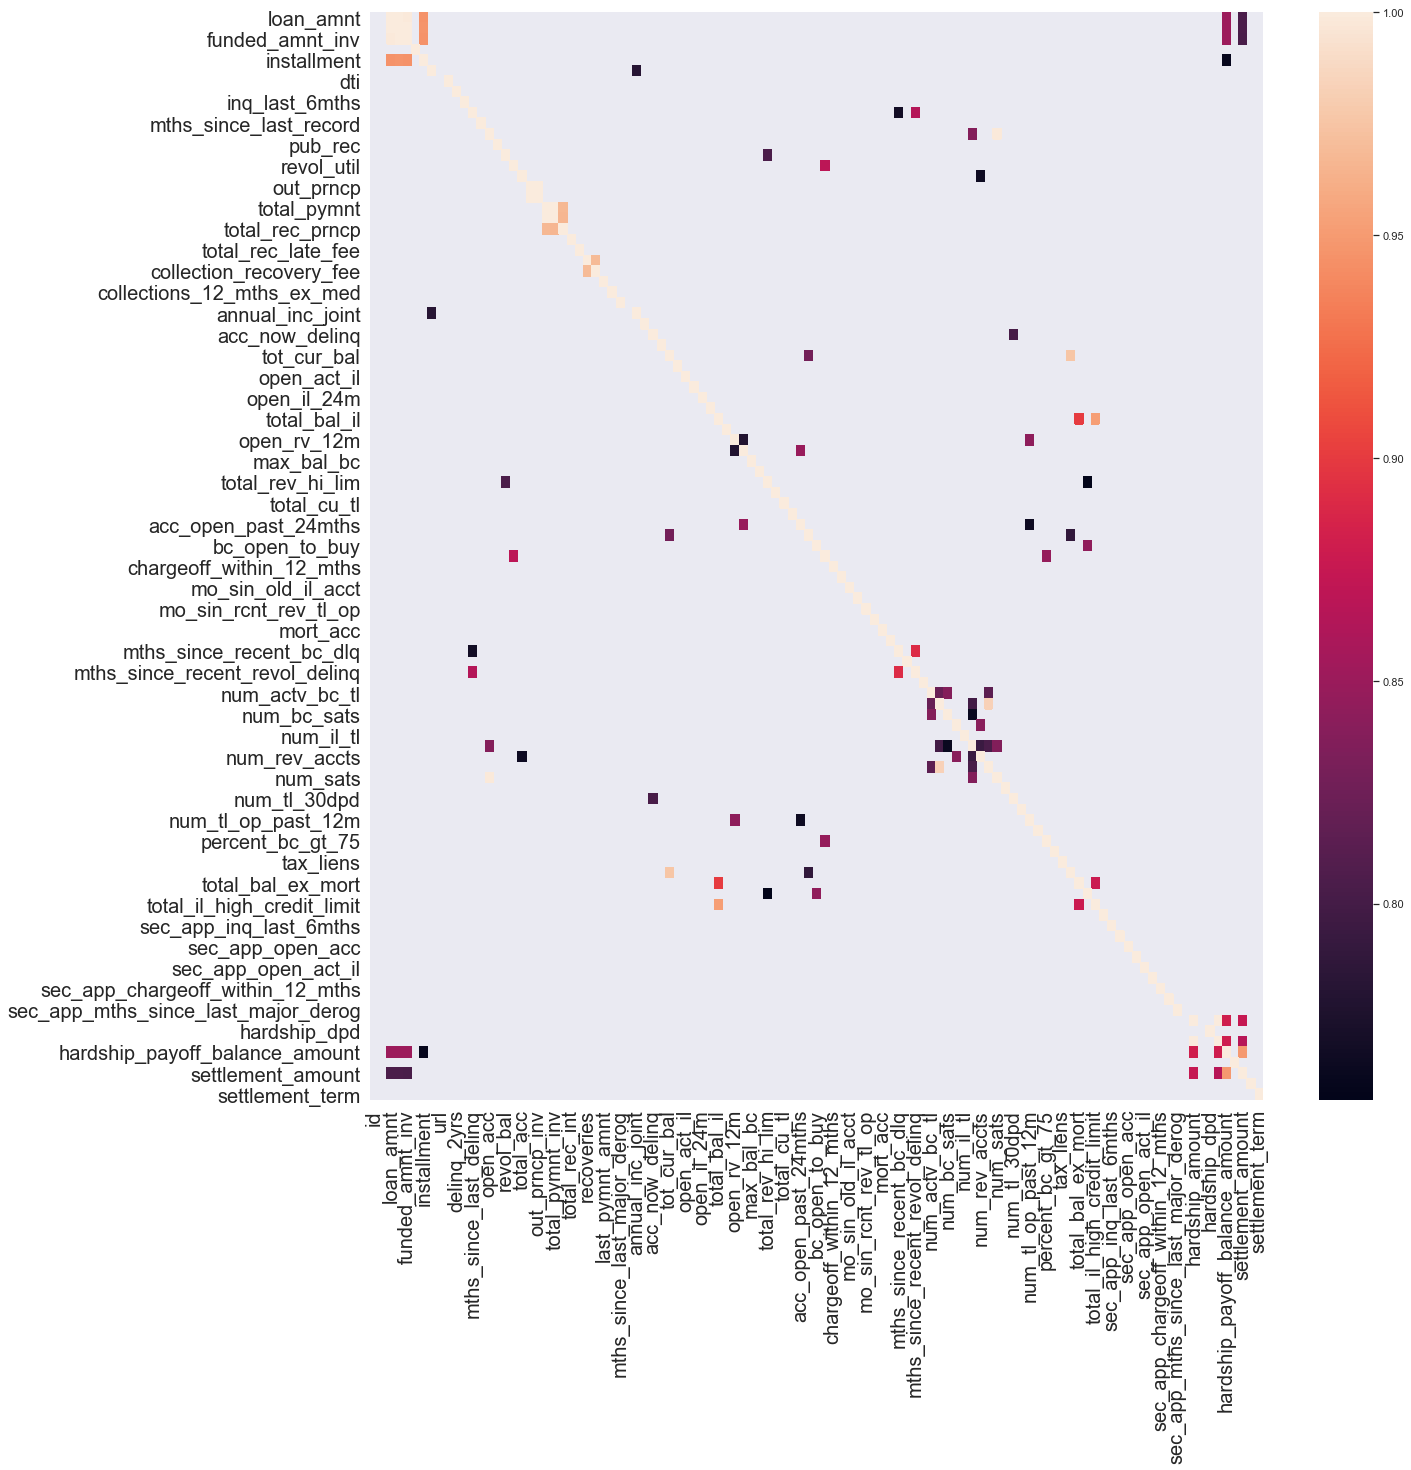

In [155]:
plt.figure(figsize=[20,20])
sns.heatmap(correlations[(correlations<-0.7) | (correlations>0.7)].dropna(how='all'))

plt.yticks(size=20)
plt.xticks(size=20);

There does exist multiple features with strong correlations that could be helpful in predicting whether a loan will be bad.